In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from numpy.random import RandomState

import abm
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [52]:
rng = RandomState(50)

In [43]:
dat = pd.read_csv('../data_clean/gss18cat.raw', sep='\s+', header=0)
dat.autmean = -dat.autmean
dat.head()

,educ,age,nonwhite,occ17,presmean,autmean
0,19,29,0,2,59.3,0.103448
1,16,29,0,7,35.9,0.083306
2,18,26,0,3,52.4,0.264063
3,12,37,0,12,30.1,0.156604
4,12,30,0,7,35.9,0.083306


In [44]:
n_i = dat.shape[0]
n_j = len(np.unique(dat.occ17))
p_i = 4
p_j = 2
choice = dat.occ17 + 1

# ---- Prepare opp, the opportunity set ----
opp = np.zeros(shape=(n_i, n_j), dtype="bool")
opp[np.arange(n_i), dat.occ17] = True  # people are offered jobs they have!
opp[:, 0] = True                     # Unemployment always offered

In [45]:
# ---- Prepare ww ----
ww = np.empty((n_j, p_j))
for i in range(n_j):
    ww[i, 0] = np.unique(dat.presmean[dat.occ17 == i])
    ww[i, 1] = np.unique(dat.autmean[dat.occ17 == i])

In [47]:
# ---- Prepare xx ----
one = np.ones(n_i)
xx = dat[["educ", "age", "nonwhite"]]
xx = np.column_stack((one, xx))

# Simulate based on real data

In [ ]:
true_beta = rng.multivariate_normal(mean = [0.5, 5],
                                    cov = [[1, 0], [0, 1]])

In [33]:
employer_list = [None] * ww.shape[0]
[Employer(w=w, beta=) for w in ww]

array([[ 18.       ,   0.256    ],
       [ 63.1      ,   4.       ],
       [ 59.3      ,   0.1034483],
       [ 52.4      ,   0.2640627],
       [ 49.5      ,  12.0039   ],
       [ 40.72     ,   0.6923337],
       [ 32.8      ,   0.200048 ],
       [ 35.9      ,   0.0833062],
       [ 40.9      ,   0.0651896],
       [ 38.4      ,   0.2981955],
       [ 40.8      ,   0.2260912],
       [ 31.4      ,   0.0720412],
       [ 30.1      ,   0.1566042],
       [ 33.5      ,   0.1230907],
       [ 18.1      ,   0.1579435],
       [ 18.5      ,   0.170275 ],
       [ 41.3      ,   9.672359 ],
       [ 20.6      ,   0.200048 ]])

In [8]:
my_ww = ww[np.array([0, 2, 8, 13]), 0]
my_beta = np.array([[0, 0, 0],
                    [-9, 0.2, 0.15],
                    [-6, 0.2, 0.1],
                    [-12, 0.1, 0.3]])
for i in range(n_employer):
    employer_list[i] = abm.Employer(w=my_ww[i], beta=my_beta[i, :])

In [9]:
my_xx = xx[np.random.choice(xx.shape[0], size=n_employee, replace=False), 0:3]
alpha = np.array([0.07])
for i in range(n_employee):
    employee_list[i] = abm.Employee(x=my_xx[i, ], alpha=alpha)

In [10]:
my_model = abm.Model(n_employer=n_employer, n_employee=n_employee)
my_alpha, beta, ww, xx, choice, true_opp, observed_opp = \
    my_model.matching_process(employer_list=employer_list, employee_list=employee_list)
wa = np.array([ee.wa for ee in employee_list])

In [11]:
np.save("ww_nojobs.npy", ww)
np.save("xx_nojobs.npy", xx)
np.save("obs_opp_nojobs.npy", observed_opp)
np.save("true_opp_nojobs.npy", true_opp)
np.save("choice_nojobs.npy", choice.astype('float64'))
np.save("wa.npy_nojobs", wa)

In [12]:
np.mean(observed_opp, axis=0)

array([ 1.   ,  0.189,  0.277,  0.15 ])

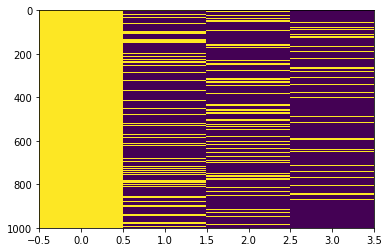

In [13]:
plt.imshow(observed_opp, aspect="auto")

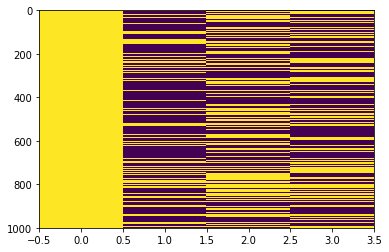

In [14]:
plt.imshow(true_opp, aspect="auto")

In [15]:
ee = employee_list[4]
ee.wa

array([ 1.55007255,  4.88141552,  3.10564755,  4.534727  ])

In [16]:
true_opp[4, :]

array([ 1.,  0.,  0.,  0.])

In [17]:
choice[4]

0.0

In [34]:
%qtconsole